In [2]:
import networkx as nx
import networkx.generators.random_graphs as rg
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

{0.0: 0.01, 0.25: 0.03, 0.5: 0.03, 0.75: 0.06, 1.0: 0.07, 1.25: 0.12, 1.5: 0.38, 1.75: 0.69, 2.0: 0.71}
{0.0: 0.001, 0.25: 0.004, 0.5: 0.008, 0.75: 0.017, 1.0: 0.109, 1.25: 0.348, 1.5: 0.628, 1.75: 0.728, 2.0: 0.816}
{0.0: 0.0001, 0.25: 0.0008, 0.5: 0.002, 0.75: 0.0056, 1.0: 0.0521, 1.25: 0.3634, 1.5: 0.5589, 1.75: 0.7025, 2.0: 0.8006}
{0.0: 1e-05, 0.25: 0.00012, 0.5: 0.00034, 0.75: 0.00086, 1.0: 0.00805, 1.25: 0.36902, 1.5: 0.58505, 1.75: 0.71564, 2.0: 0.79763}


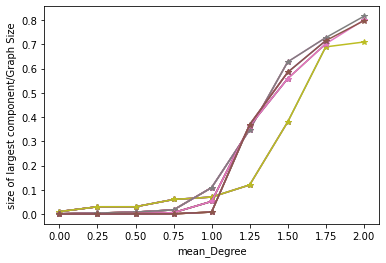

In [70]:

lines = []
allN = [100,1000, 10000, 100000]
for n in allN:
    giant = {}
    tenN = 10*n
    for mean_D in [x * .01 for x in range(0, 225,25)]:
        p = mean_D / (n-1)
        g = rg.fast_gnp_random_graph(n, p, False)
        Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
        G0 = g.subgraph(Gcc[0])
        fraction = len(G0)/len(g)
        giant[mean_D] = fraction
        lines += plt.plot(list(giant.keys()), list(giant.values()), linestyle='-', marker='*')
    print(giant)
       
    
#plt.legend(lines, ['n='+str(l) for l in allN])
plt.xlabel("mean_Degree")
plt.ylabel("size of largest component/Graph Size")
plt.show()


Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...


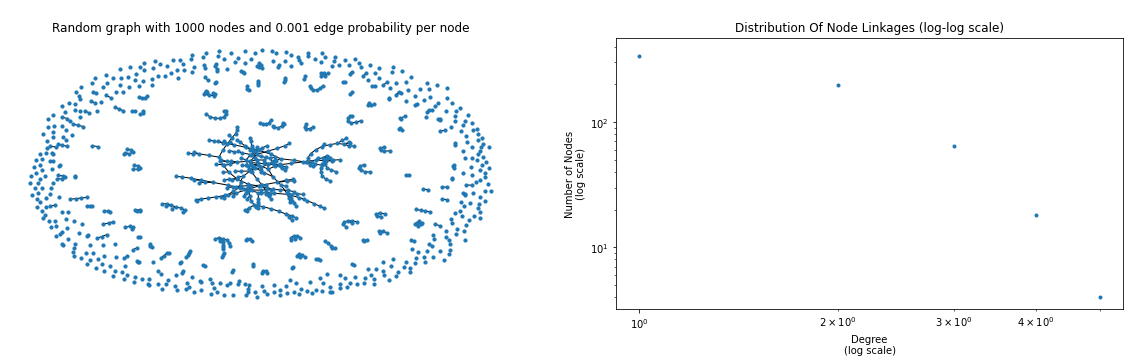

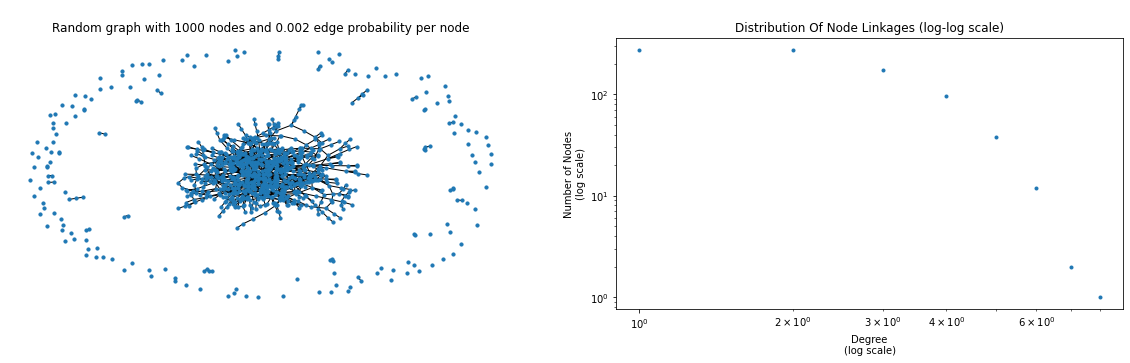

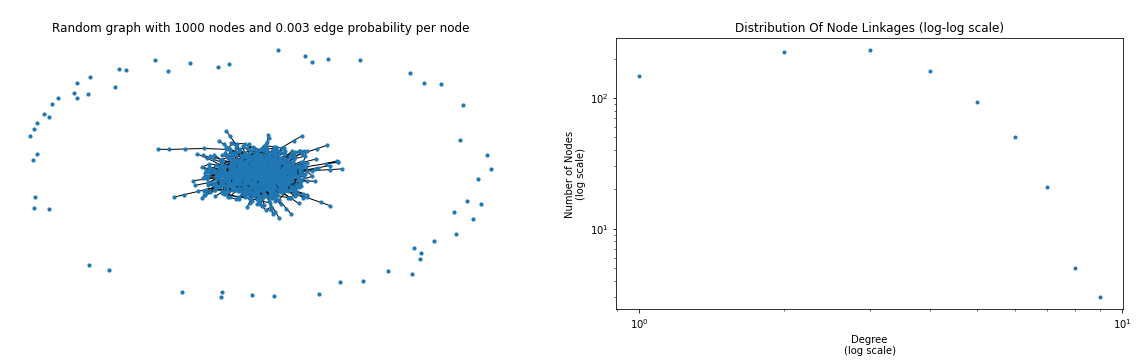

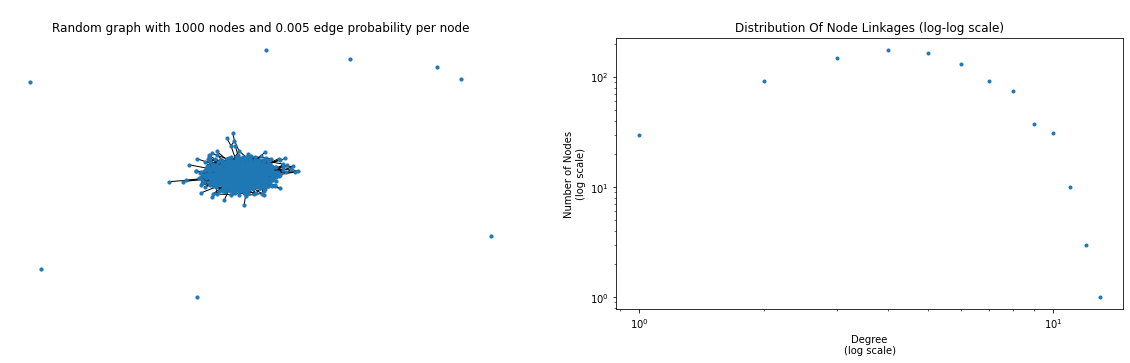

In [160]:
#Random graph
n = 1000
for nbr in [.1,.2,.3,.5]:
    g = rg.fast_gnp_random_graph(n,nbr/100 )
    plt.figure(figsize=(20, 5)) 
    plt.subplot(1, 2, 1)
    ax = plt.gca()
    ax.set_title('Random graph with ' + str(n) + ' nodes and ' + str(nbr/100) + ' edge probability per node')
    nx.draw_spring(g,node_size=10, edge_size=.5)
    
    #plt.figure(figsize=(4, 4))
    plt.subplot(1, 2, 2)
    plt.title('\nDistribution Of Node Linkages (log-log scale)')
    plt.xlabel('Degree\n(log scale)')
    plt.ylabel('Number of Nodes\n(log scale)')
    plt.xscale("log")
    plt.yscale("log")
    aux_x, aux_y = plot_degree_histogram(g, False)
    plt.plot(aux_x, aux_y, '.')

Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...


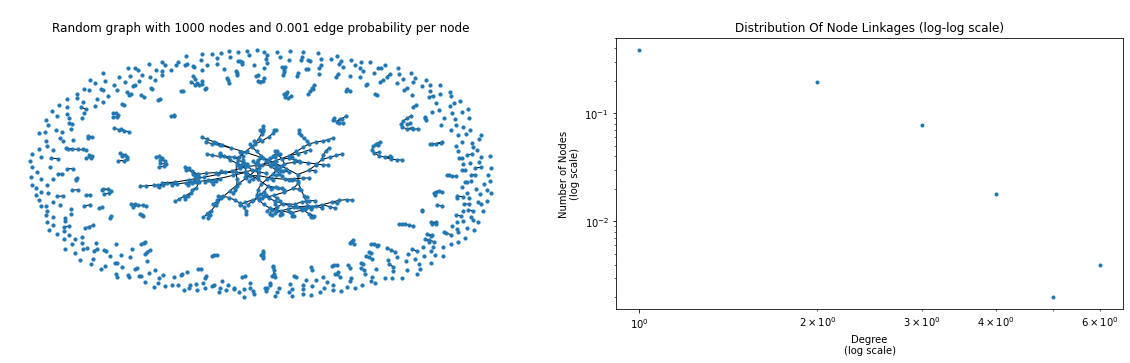

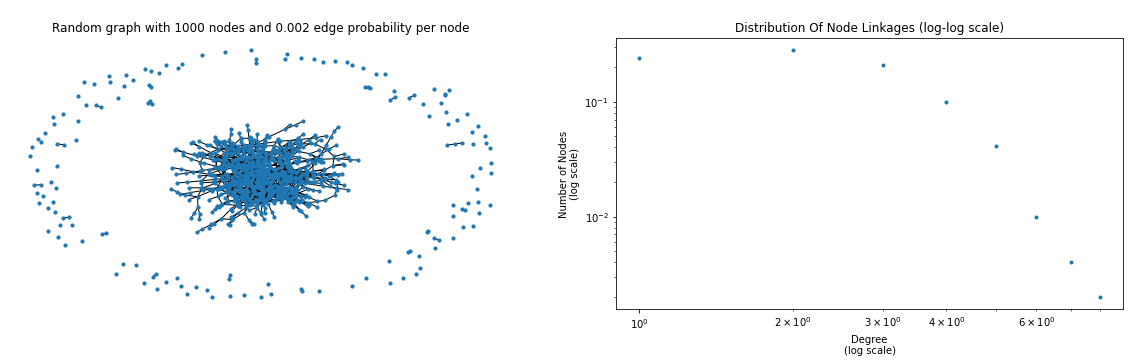

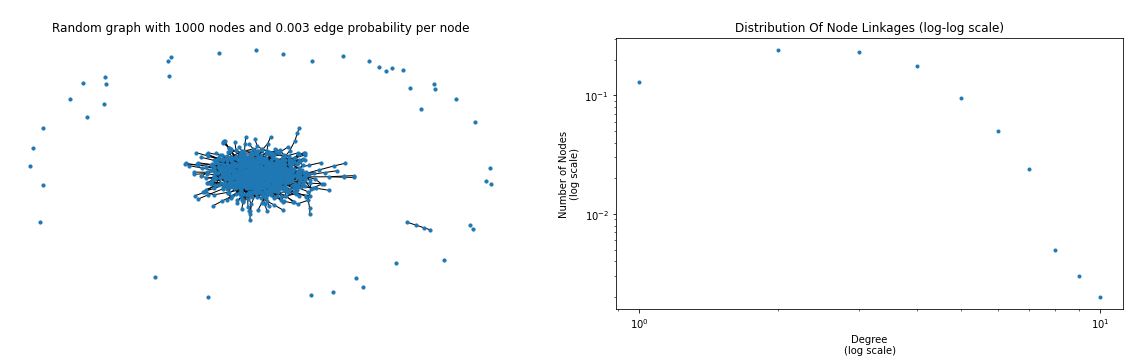

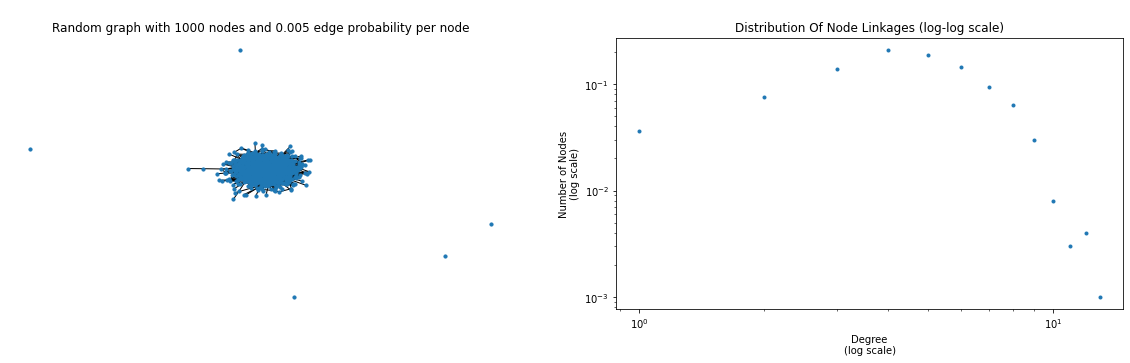

In [159]:
#Random graph
n = 1000
for nbr in [.1,.2,.3,.5]:
    g = rg.fast_gnp_random_graph(n,nbr/100 )
    plt.figure(figsize=(20, 5)) 
    plt.subplot(1, 2, 1)
    ax = plt.gca()
    ax.set_title('Random graph with ' + str(n) + ' nodes and ' + str(nbr/100) + ' edge probability per node')
    nx.draw_spring(g,node_size=10, edge_size=.5)
    
    #plt.figure(figsize=(4, 4))
    plt.subplot(1, 2, 2)
    plt.title('\nDistribution Of Node Linkages (log-log scale)')
    plt.xlabel('Degree\n(log scale)')
    plt.ylabel('Number of Nodes\n(log scale)')
    plt.xscale("log")
    plt.yscale("log")
    aux_x, aux_y = plot_degree_histogram(g, False)
    plt.plot(aux_x, aux_y, '.')

Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...


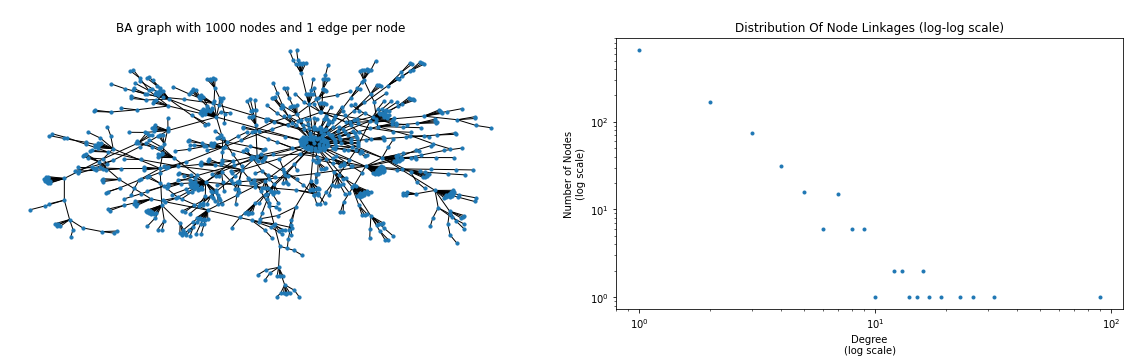

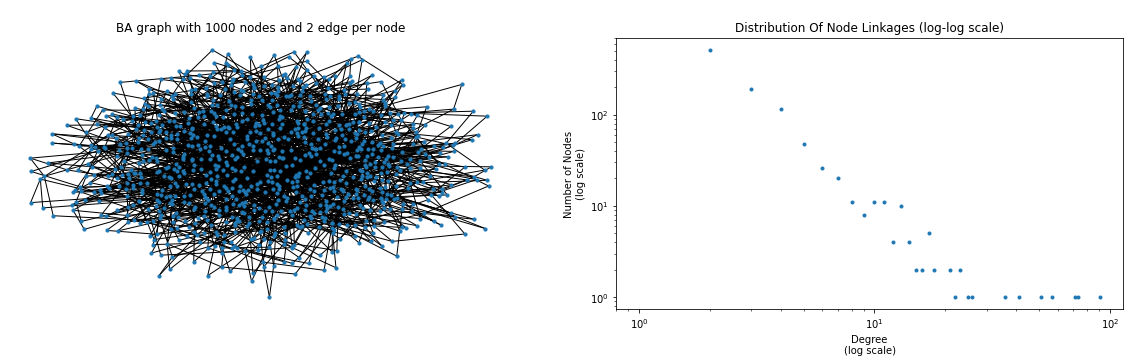

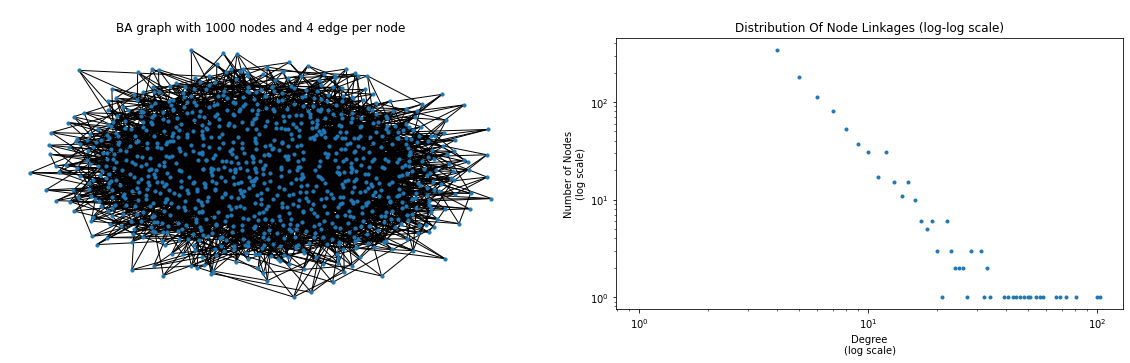

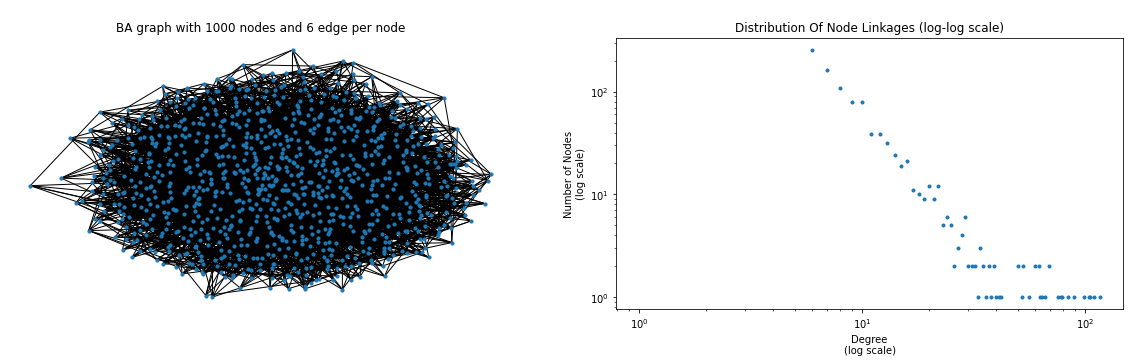

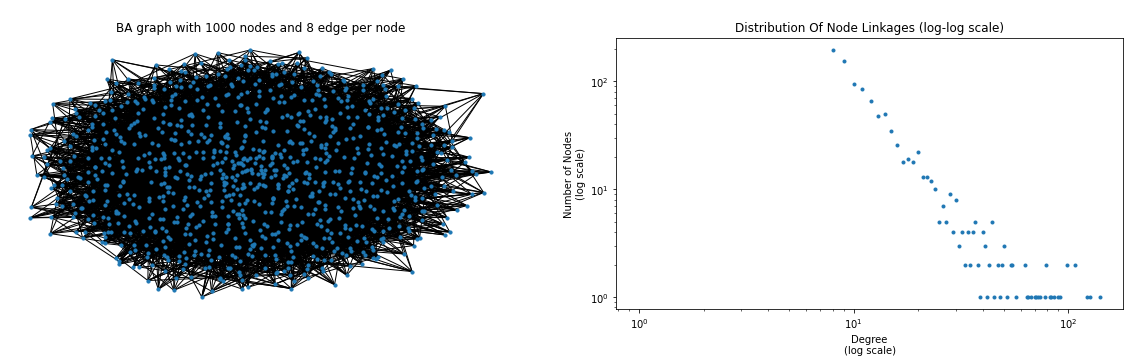

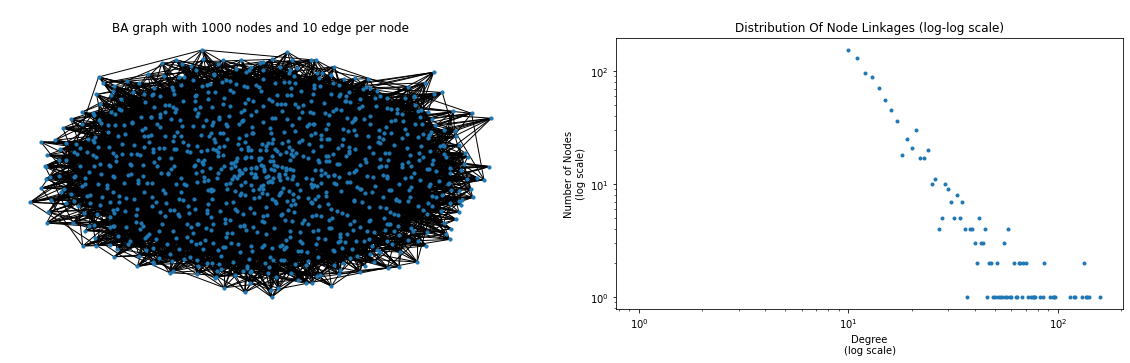

In [161]:
#BA graph
n = 1000
for nbr in [1,2,4,6,8,10]:
    g = rg.barabasi_albert_graph(n, nbr)
    plt.figure(figsize=(20, 5)) 
    plt.subplot(1, 2, 1)
    ax = plt.gca()
    ax.set_title('BA graph with ' + str(n) + ' nodes and ' + str(nbr) + ' edge per node')
    nx.draw_spring(g,node_size=10, edge_size=.5)
    
    #plt.figure(figsize=(4, 4))
    plt.subplot(1, 2, 2)
    plt.title('\nDistribution Of Node Linkages (log-log scale)')
    plt.xlabel('Degree\n(log scale)')
    plt.ylabel('Number of Nodes\n(log scale)')
    plt.xscale("log")
    plt.yscale("log")
    aux_x, aux_y = plot_degree_histogram(g, False)
    plt.plot(aux_x, aux_y, '.')

In [142]:
g 

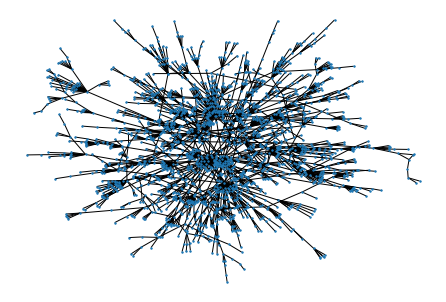

In [105]:
nx.draw_spring(g,node_size=2, edge_size=1)

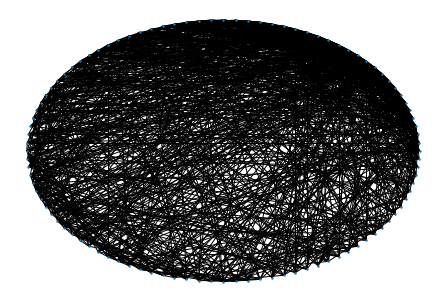

In [144]:
nx.draw_circular(g,node_size=2, edge_size=1)

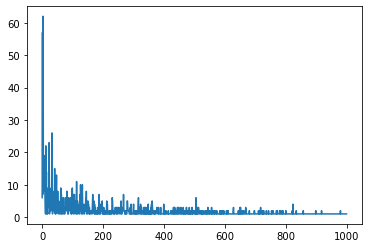

In [111]:
degrees = [g.degree(n) for n in g.nodes()]
plt.plot(degrees)
plt.show()

Text(0, 0.5, 'Frequency')

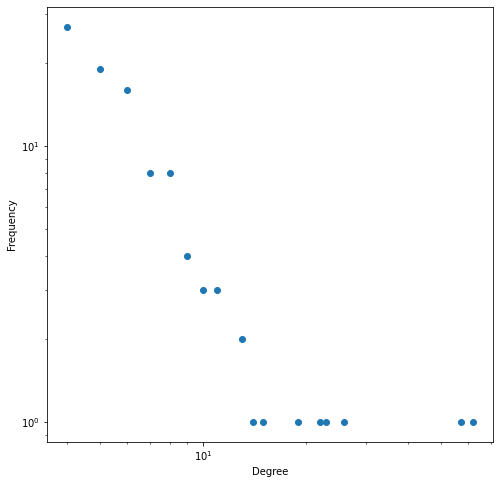

In [117]:
m=4
degree_freq = nx.degree_histogram(g)
degrees = range(len(degree_freq))
plt.figure(figsize=(8, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'o') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [118]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

Creating histogram...


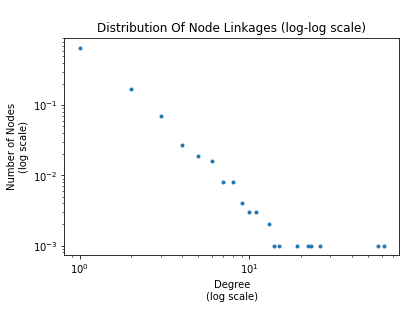

In [122]:
import numpy as np
plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
aux_x, aux_y = plot_degree_histogram(g)
plt.plot(aux_x, aux_y, '.')

In [4]:
highM = np.array([[0,3,1,1,1,0,0,0,0,0], 
                  [3,0,1,1,1,1,1,0,0,0],
                 [1,1,0,0,0,0,0,0,0,0],
                  [1,1,0,0,0,0,0,0,0,0],
                  [1,1,0,0,0,0,0,0,0,0],
                 [0,1,0,0,0,0,1,1,1,0],
                 [0,1,0,0,0,1,0,0,0,0],
                 [0,0,0,0,0,1,0,0,2,1],
                  [0,0,0,0,0,1,0,2,0,1],
                  [0,0,0,0,0,0,0,1,1,0]
                 ])
highM

array([[0, 3, 1, 1, 1, 0, 0, 0, 0, 0],
       [3, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 2, 1],
       [0, 0, 0, 0, 0, 1, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

In [5]:
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

In [75]:
np.sum(highM,axis=0)

array([6, 8, 2, 2, 2, 4, 2, 4, 4, 2])

In [11]:
w, v = LA.eig(highM)
w
v

array([[-5.66813923e-01, -1.68199527e-01, -6.39877699e-01,
        -2.18958932e-01,  2.86417292e-01,  3.32079495e-01,
        -2.70694685e-02, -7.90558938e-18,  6.74409471e-17,
         1.15303675e-18],
       [-6.18555354e-01, -9.84429136e-02,  7.20817898e-01,
         8.55195950e-02,  9.20183576e-02,  2.64345615e-01,
         4.96008172e-02,  5.93293332e-17,  2.45685182e-17,
        -8.62769428e-17],
       [-2.56066423e-01, -8.25831810e-02, -2.48040208e-02,
        -1.50312785e-01, -2.41577622e-01, -4.21118882e-01,
        -4.50921899e-02,  4.88579276e-01, -1.73868081e-16,
        -8.11702274e-01],
       [-2.56066423e-01, -8.25831810e-02, -2.48040208e-02,
        -1.50312785e-01, -2.41577622e-01, -4.21118882e-01,
        -4.50921899e-02, -8.10829767e-01,  1.59609192e-16,
         4.82366262e-01],
       [-2.56066423e-01, -8.25831810e-02, -2.48040208e-02,
        -1.50312785e-01, -2.41577622e-01, -4.21118882e-01,
        -4.50921899e-02,  3.22250491e-01, -2.26549762e-16,
         3.

In [77]:
np.sum(highM,axis=1)

array([6, 8, 2, 2, 2, 4, 2, 4, 4, 2])

In [22]:
D = np.zeros((10,10))
hmSum = np.sum(highM,axis=1)
np.fill_diagonal(D,hmSum)
D

array([[6., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 8., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]])

In [66]:
1/np.sqrt(2)

0.7071067811865475

In [60]:
D_n_hlf

array([[0.40824829, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35355339, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.70710678, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [29]:
highLD = csgraph.laplacian(highM, normed=True)

In [36]:
D_n_hlf = fractional_matrix_power(D,-.5)

In [45]:
L = D_n_hlf *(D-highM) * D_n_hlf

In [46]:
L

array([[ 1., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  1., -0., -0., -0., -0., -0.,  0.,  0.,  0.],
       [-0., -0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  0.,  0.,  1., -0., -0., -0.,  0.],
       [ 0., -0.,  0.,  0.,  0., -0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -0.,  0.,  1., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  1., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  1.]])

In [69]:
sum(D-highM)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [67]:
L2 = D_n_hlf.dot(D-highM).dot(D_n_hlf)
L2

array([[ 1.        , -0.4330127 , -0.28867513, -0.28867513, -0.28867513,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.4330127 ,  1.        , -0.25      , -0.25      , -0.25      ,
        -0.1767767 , -0.25      ,  0.        ,  0.        ,  0.        ],
       [-0.28867513, -0.25      ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.28867513, -0.25      ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.28867513, -0.25      ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.1767767 ,  0.        ,  0.        ,  0.        ,
         1.        , -0.35355339, -0.25      , -0.25      ,  0.        ],
       [ 0.        , -0.25      ,  0.        ,  0.        ,  0.        ,
        -0.35355339,  1.        ,  0.        

In [48]:
w,v = LA.eig(L2)

In [80]:
sorted(w)

[-2.7755575615628914e-17,
 0.11513980004530006,
 0.6704982705063474,
 1.0000000000000002,
 1.0000000000000004,
 1.2143619294483523,
 1.4999999999999984,
 1.5,
 1.5000000000000007,
 1.5000000000000018]

In [78]:
v

array([[-4.08248290e-01, -3.72020047e-01, -2.59630260e-01,
         9.20810910e-02,  7.86795792e-01, -1.24987016e-02,
        -6.87002423e-17, -7.19424191e-18,  4.94074148e-03,
        -1.21010584e-03],
       [-4.71404521e-01, -3.30650138e-01,  1.02229126e-01,
        -1.51910615e-01, -3.49428279e-01, -7.03434580e-01,
        -3.39762999e-16, -1.59478100e-16, -4.95787156e-02,
         7.29906440e-02],
       [-2.35702260e-01, -2.14785874e-01, -1.49897600e-01,
         5.31630426e-02, -2.79542623e-01,  3.58933419e-01,
        -8.12442070e-01, -2.96539473e-01,  2.19368194e-02,
        -3.57966671e-02],
       [-2.35702260e-01, -2.14785874e-01, -1.49897600e-01,
         5.31630426e-02, -2.79542623e-01,  3.58933419e-01,
         4.76601516e-01,  8.07093124e-01,  2.19368194e-02,
        -3.57966671e-02],
       [-2.35702260e-01, -2.14785874e-01, -1.49897600e-01,
         5.31630426e-02, -2.79542623e-01,  3.58933419e-01,
         3.35840554e-01, -5.10553651e-01,  2.19368194e-02,
        -3.

In [52]:
w

array([-2.77555756e-17,  1.15139800e-01,  6.70498271e-01,  1.21436193e+00,
        1.50000000e+00,  1.50000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.50000000e+00,  1.50000000e+00])

In [58]:
D_n_hlf.dot(v[1])

array([-1.92450090e-01, -1.16902477e-01,  7.22869086e-02, -1.07417026e-01,
       -2.47083106e-01, -3.51717290e-01, -2.40248721e-16, -7.97390499e-17,
       -2.47893578e-02,  5.16121793e-02])

In [73]:
for i in range(0,len(v)):
    print(np.argsort(D_n_hlf.dot(v[i])))

[2 0 1 5 9 6 7 8 3 4]
[5 4 0 1 3 8 6 7 9 2]
[6 4 7 2 0 1 9 8 3 5]
[4 2 0 1 9 8 3 5 6 7]
[7 4 2 0 1 9 8 3 5 6]
[8 0 7 6 4 1 9 5 3 2]
[3 0 9 1 7 6 4 5 8 2]
[0 2 5 4 6 7 3 1 8 9]
[9 0 2 5 4 6 7 8 3 1]
[3 2 8 0 7 6 4 9 5 1]


In [50]:
v

array([[-4.08248290e-01, -3.72020047e-01, -2.59630260e-01,
         9.20810910e-02,  7.86795792e-01, -1.24987016e-02,
        -6.87002423e-17, -7.19424191e-18,  4.94074148e-03,
        -1.21010584e-03],
       [-4.71404521e-01, -3.30650138e-01,  1.02229126e-01,
        -1.51910615e-01, -3.49428279e-01, -7.03434580e-01,
        -3.39762999e-16, -1.59478100e-16, -4.95787156e-02,
         7.29906440e-02],
       [-2.35702260e-01, -2.14785874e-01, -1.49897600e-01,
         5.31630426e-02, -2.79542623e-01,  3.58933419e-01,
        -8.12442070e-01, -2.96539473e-01,  2.19368194e-02,
        -3.57966671e-02],
       [-2.35702260e-01, -2.14785874e-01, -1.49897600e-01,
         5.31630426e-02, -2.79542623e-01,  3.58933419e-01,
         4.76601516e-01,  8.07093124e-01,  2.19368194e-02,
        -3.57966671e-02],
       [-2.35702260e-01, -2.14785874e-01, -1.49897600e-01,
         5.31630426e-02, -2.79542623e-01,  3.58933419e-01,
         3.35840554e-01, -5.10553651e-01,  2.19368194e-02,
        -3.

In [54]:
v[1]

array([-4.71404521e-01, -3.30650138e-01,  1.02229126e-01, -1.51910615e-01,
       -3.49428279e-01, -7.03434580e-01, -3.39762999e-16, -1.59478100e-16,
       -4.95787156e-02,  7.29906440e-02])

# Kron Graph visuzlization after running emailEU Dept 1 on puma

In [3]:
from networkx.algorithms import bipartite

In [4]:
G = bipartite.read_edgelist('./data/EmailEU/email-Eu-core-temporal-Dept1.txt.kronfit')

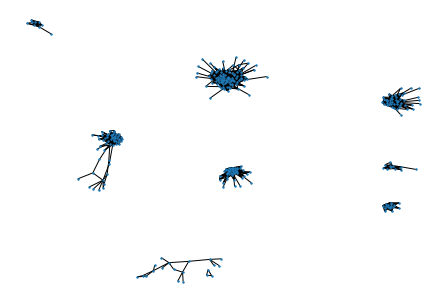

In [15]:
nx.draw(G,node_size=2, edge_size=1)

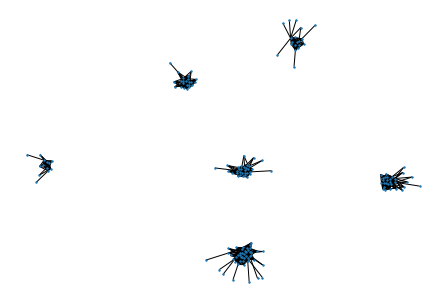

In [17]:
G2 = bipartite.read_edgelist('./data/EmailEU/email-Eu-core-temporal-Dept2.txt.kronfit')
nx.draw(G2,node_size=2, edge_size=1)

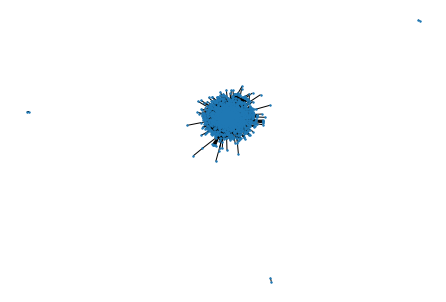

In [111]:
G2 = bipartite.read_edgelist('./data/CollegeMsg/CollegeMsg.txt.kronfit')
nx.draw(G2,node_size=2, edge_size=1)

In [113]:
print(G2.number_of_nodes())
print(G2.number_of_edges())

1899
13838


In [116]:
G2 = nx.read_edgelist("./data/CollegeMsg/CollegeMsg.txt", nodetype=int, data=(("time", int),))

In [117]:
print(G2.number_of_nodes())
print(G2.number_of_edges())

1899
13838


In [ ]:
# plot time plot for original and .6 syth ITEM graph for collegemsg
clg

1899
59835


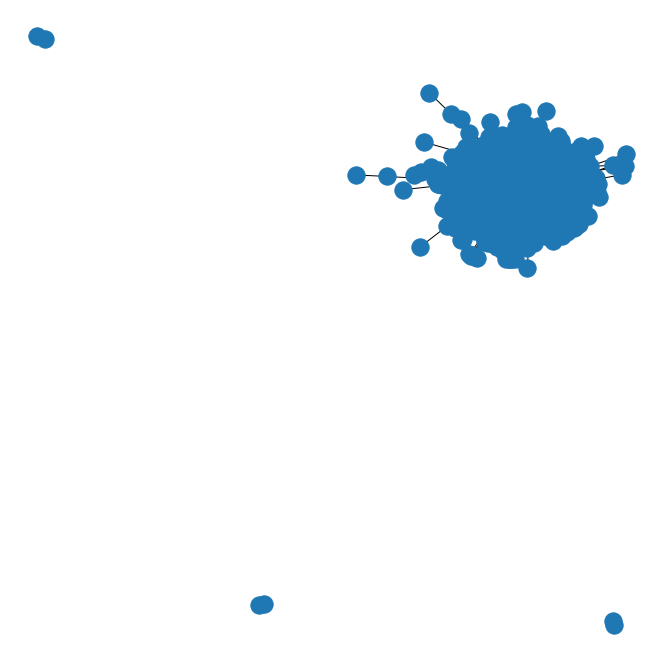

In [130]:

import networkx as nx
import matplotlib.pyplot as plt
  
G2 = nx.MultiGraph()
with open('./data/CollegeMsg/CollegeMsg.txt') as inf:
    for line in inf:
        larr = line.split(' ')
        G2.add_edge(larr[0],larr[1],time=larr[2])

print(G2.number_of_nodes())
print(G2.number_of_edges())


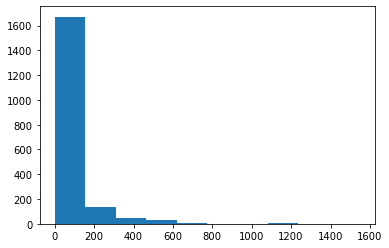

In [132]:
plot_dd(G2)

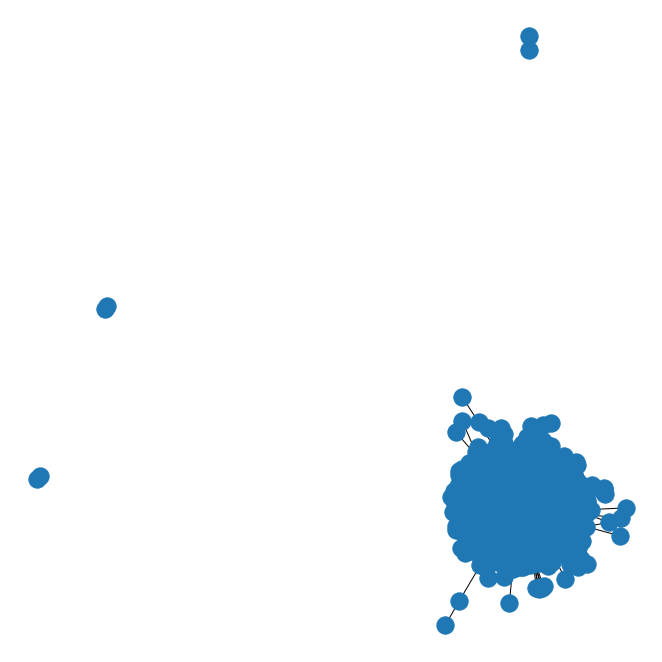

In [131]:
plt.figure(figsize =(9, 9))
nx.draw_spring(G, with_label = True)

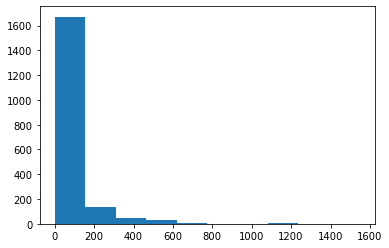

In [129]:
plot_dd(G2)

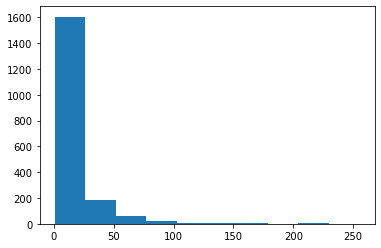

In [19]:
degrees = [G2.degree(n) for n in G2.nodes()]
plt.hist(degrees)
plt.show()

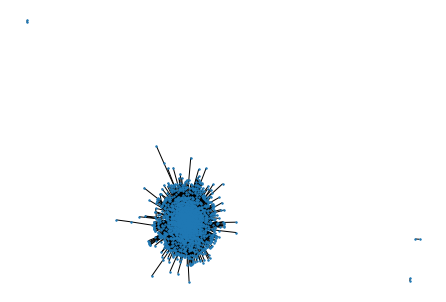

In [24]:
nx.draw_spring(G2,node_size=2, edge_size=1)

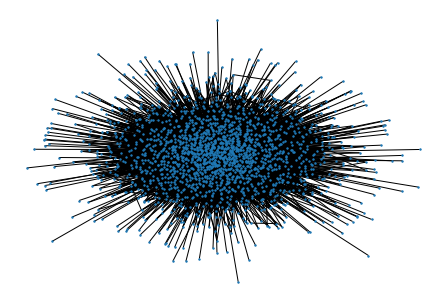

In [21]:
clg_i11 = bipartite.read_edgelist('./data/CollegeMsg/CollegeMsg.txt.krongen_i11')
nx.draw(clg_i11,node_size=2, edge_size=1)


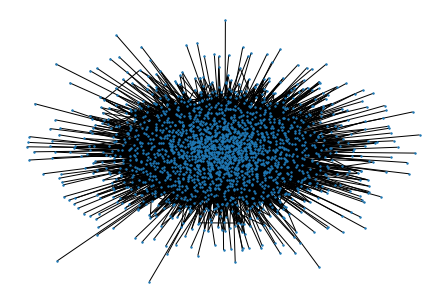

In [23]:
nx.draw_spring(clg_i11,node_size=2, edge_size=1)

In [149]:
print(clg_i11.number_of_nodes())
print(clg_i11.number_of_edges())

1952
18193


[0,
 0,
 2022,
 5692,
 6579,
 12218,
 25678,
 26850,
 30970,
 33067,
 36082,
 40862,
 55780,
 69719,
 75866,
 88057,
 88334,
 94962,
 110137,
 111756,
 112544,
 117316,
 123946,
 126096,
 132148,
 132564,
 137019,
 152347,
 155864,
 157932,
 182321,
 190738,
 198045,
 199291,
 200377,
 200383,
 200543,
 202960,
 210000,
 213626,
 214302,
 219465,
 236790,
 242197,
 243382,
 271549,
 276990,
 296760,
 317895,
 321308,
 324850,
 338316,
 340254,
 345570,
 366812,
 367637,
 387901,
 394688,
 415793,
 416593,
 420671,
 431961,
 437979,
 440859,
 447760,
 470436,
 477067,
 489431,
 497151,
 507934,
 513452,
 529062,
 532491,
 533694,
 546659,
 551869,
 553949,
 577055,
 578706,
 579880,
 580366,
 584178,
 584249,
 608017,
 611676,
 622571,
 628442,
 633049,
 633310,
 638142,
 639371,
 642897,
 644982,
 678554,
 680385,
 689657,
 691664,
 700262,
 707197,
 708469,
 710165,
 714310,
 719547,
 719860,
 720044,
 720295,
 732554,
 732742,
 734229,
 736891,
 778463,
 778614,
 782939,
 797178,
 81

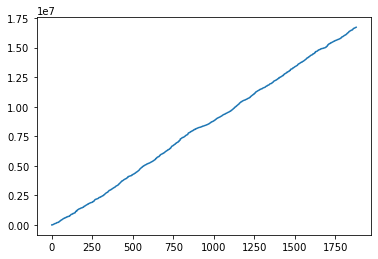

In [171]:
#get node birthrate plot
import sys
node_birth = {}
with open('./data/CollegeMsg/CollegeMsg-eType-T6-May11-0.6-Synth_backup.txt') as inf:
    for line in inf:
        if line.startswith('#'):
            continue
        larr = line.strip().split(' ')
        src = int(larr[0])
        dst = int(larr[1])
        node_birth[src] = min(node_birth.get(src,sys.maxsize),int(larr[3]))
        node_birth[dst] = min(node_birth.get(dst,sys.maxsize),int(larr[3]))
plt.plot(list(node_birth.values()))
list(node_birth.values())

[1082040961,
 1082040961,
 1082155839,
 1082155839,
 1082414391,
 1082439619,
 1082439619,
 1082439756,
 1082440403,
 1082440403,
 1082440453,
 1082441188,
 1082441188,
 1082441754,
 1082441824,
 1082441895,
 1082442153,
 1082442560,
 1082443023,
 1082444944,
 1082444944,
 1082450074,
 1082450243,
 1082450645,
 1082467089,
 1082481125,
 1082490240,
 1082490240,
 1082504083,
 1082517506,
 1082517506,
 1082518023,
 1082518023,
 1082525530,
 1082525530,
 1082530949,
 1082530949,
 1082538849,
 1082538849,
 1082539557,
 1082540305,
 1082574211,
 1082576344,
 1082585468,
 1082585468,
 1082587705,
 1082588508,
 1082589483,
 1082596555,
 1082597715,
 1082597751,
 1082598056,
 1082598395,
 1082598395,
 1082598545,
 1082598548,
 1082598548,
 1082598765,
 1082598920,
 1082599717,
 1082600068,
 1082600409,
 1082602619,
 1082602668,
 1082602682,
 1082603219,
 1082603514,
 1082603681,
 1082605390,
 1082607167,
 1082608405,
 1082608481,
 1082609649,
 1082609649,
 1082610117,
 1082610339,
 1082611326,

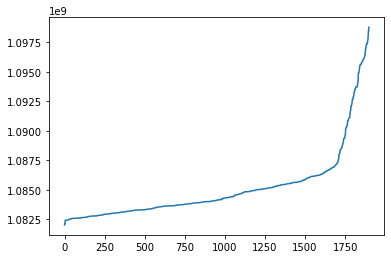

In [172]:
#get node birthrate plot
import sys
node_birth = {}
with open('./data/CollegeMsg/CollegeMsg.txt') as inf:
    for line in inf:
        if line.startswith('Source'):
            continue
        larr = line.strip().split(' ')
        src = int(larr[0])
        dst = int(larr[1])
        node_birth[src] = min(node_birth.get(src,sys.maxsize),int(larr[2]))
        node_birth[dst] = min(node_birth.get(dst,sys.maxsize),int(larr[2]))
plt.plot(list(node_birth.values()))
list(node_birth.values())

In [139]:
# get degree distribution of clg_msg kron_i11
node_deg = {}
with open('./data/CollegeMsg/CollegeMsg.txt.krongen_i11') as inf:
    for line in inf:
        if line.startswith('#'):
            continue
        larr = line.strip().split('\t')
        src = int(larr[0])
        dst = int(larr[1])
        node_deg[src] = node_deg.get(src,0) + 1
        node_deg[dst] = node_deg.get(dst,0) + 1

In [144]:
of = open('./data/CollegeMsg/CollegeMsg.txt.krongen_i11_degDist','w',encoding='utf-8')
for node,deg in node_deg.items():
    of.write(",".join([str(deg),str(node)]) + '\n')
of.flush()

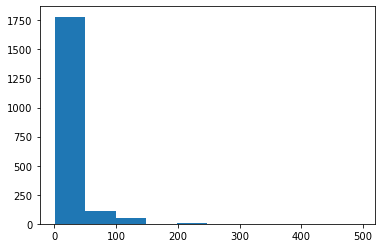

In [22]:
degrees = [clg_i11.degree(n) for n in clg_i11.nodes()]
plt.hist(degrees)
plt.show()

309
1938


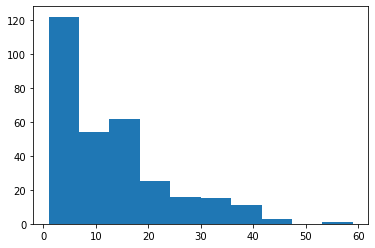

In [13]:
print(G.number_of_nodes())
print(G.number_of_edges())
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.show()

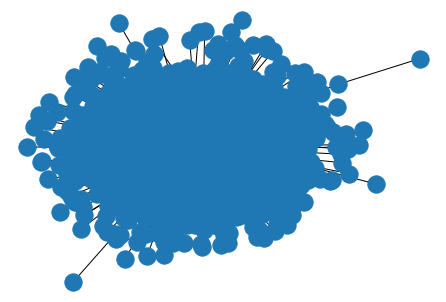

In [11]:
kronG11 = bipartite.read_edgelist('./data/EmailEU/email-Eu-core-temporal-Dept1.txt.krongen_i11')
nx.draw(kronG)

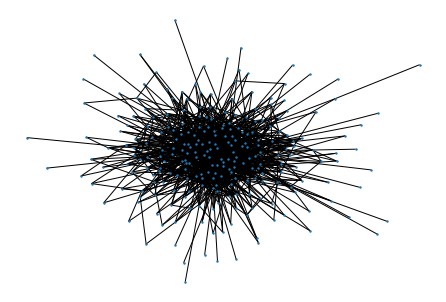

In [16]:
kronG8 = bipartite.read_edgelist('./data/EmailEU/email-Eu-core-temporal-Dept1.txt.krongen_i8')
nx.draw(kronG8,node_size=2, edge_size=1)

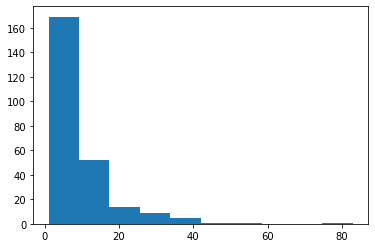

In [14]:
degrees = [kronG8.degree(n) for n in kronG8.nodes()]
plt.hist(degrees)
plt.show()

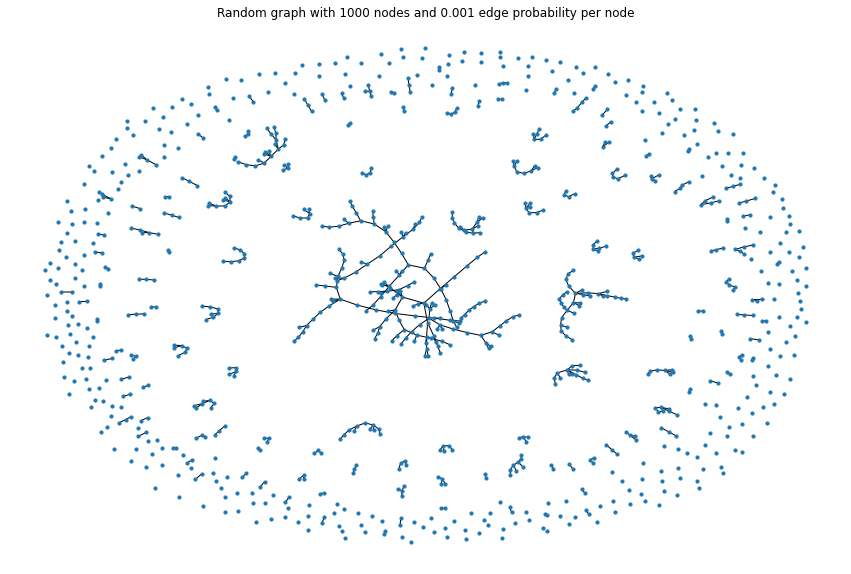

In [36]:
# use random graphs to generate kron graph
n=1000
nbr=.1
g = rg.fast_gnp_random_graph(n,nbr/100 )
plt.figure(figsize=(15, 10)) 
#plt.subplot(1, 2, 1)
ax = plt.gca()
ax.set_title('Random graph with ' + str(n) + ' nodes and ' + str(nbr/100) + ' edge probability per node')
nx.draw_spring(g,node_size=10, edge_size=.5)

In [27]:
def plot_dd(g):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.hist(degrees)
    plt.show()

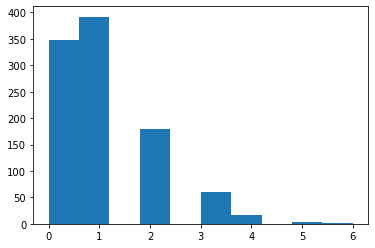

In [37]:
plot_dd(g)

In [43]:
nx.write_edgelist(g,'random_1k_.1.kronfit',data=False)

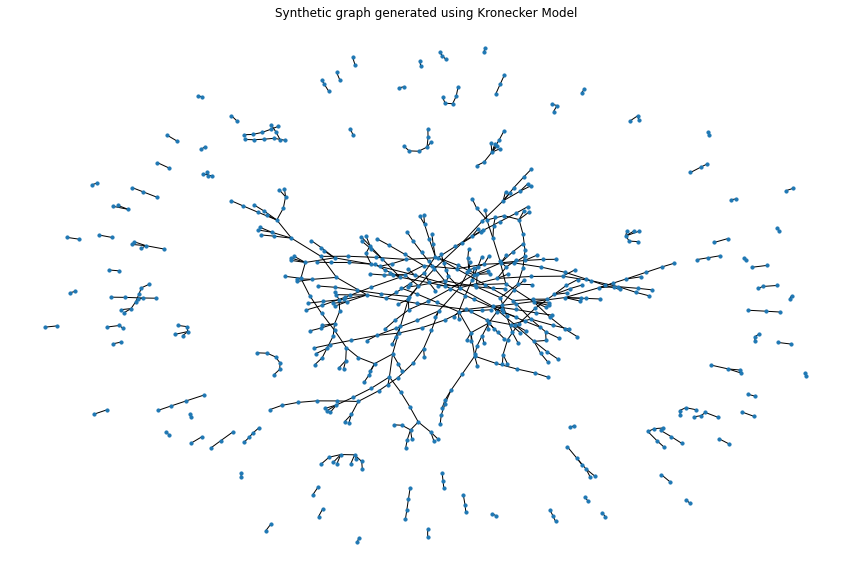

In [48]:
kronG_random_1k_1 = bipartite.read_edgelist('./data/random_1k_.1.kronfit_i10')
plt.figure(figsize=(15, 10)) 
ax = plt.gca()
ax.set_title('Synthetic graph generated using Kronecker Model')
nx.draw(kronG_random_1k_1,node_size=10, edge_size=.5)

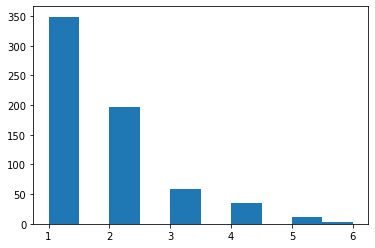

In [46]:
plot_dd(kronG_random_1k_1)

In [49]:
def plot_graph(edgefile,title='Synthetic graph generated using Kronecker Model'):
    g = bipartite.read_edgelist(edgefile)
    plt.figure(figsize=(15, 10)) 
    ax = plt.gca()
    ax.set_title(title)
    nx.draw(g,node_size=10, edge_size=.5)

In [51]:
import pandas as pd

In [52]:
maaB0C1 = pd.read_csv('./data/MAA_ITeMGraph/B0/V4-C1-B0.csv')

In [55]:
 G=nx.from_pandas_edgelist(maaB0C1, 'Source', 'Destination')

In [58]:
print(G.number_of_edges())

107068


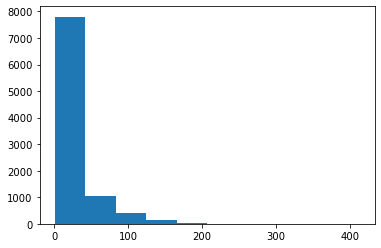

In [60]:
plot_dd(G)

In [61]:
import matplotlib.pyplot as plt 

In [97]:
clg_msg = pd.read_csv('./data/CollegeMsg/CollegeMsg.txt',header=None,sep=' ')

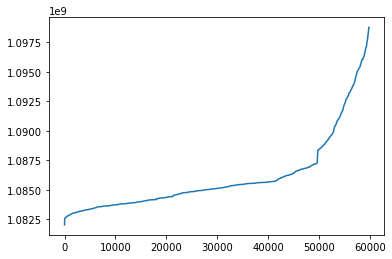

In [145]:
plt.plot(clg_msg.iloc[:,2])

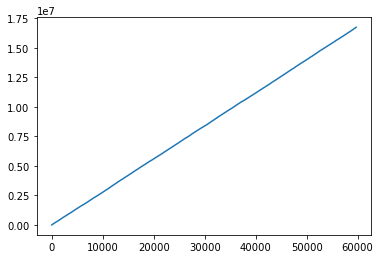

In [148]:
clg_msg_item = pd.read_csv('./data/CollegeMsg/CollegeMsg-eType-T6-May11-0.6-Synth_backup.txt',header=None,sep=' ')
clg_msg_item
plt.plot(clg_msg_item.iloc[:,3])

In [100]:
clg_msg.columns = ['Source','Target','Time']
clg_msg

,Source,Target,Time
0,1,2,1082040961
1,3,4,1082155839
2,5,2,1082414391
3,6,7,1082439619
4,8,7,1082439756
...,...,...,...
59830,1899,1847,1098776648
59831,1899,1097,1098776836
59832,1899,277,1098777003
59833,1878,1624,1098777111


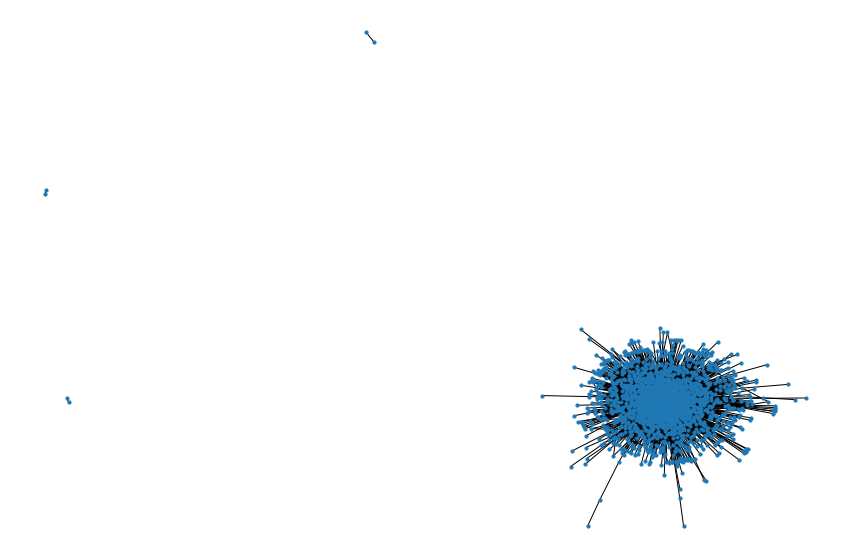

In [109]:
G=nx.from_pandas_edgelist(clg_msg, 'Source', 'Target')
plt.figure(figsize=(15, 10)) 
ax = plt.gca()
nx.draw(G,node_size=10, edge_size=3)
#nx.draw_kamada_kawai(G,node_size=10, edge_size=.5)


In [74]:
clg_msg_synth = pd.read_csv('./data/CollegeMsg/CollegeMsg-eType-T6-May11-0.6-Synth_backup.txt',sep=' ',header=None)

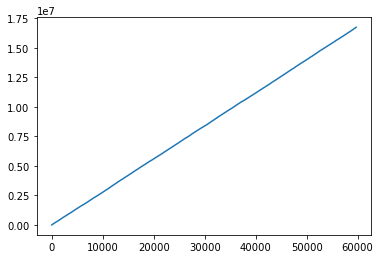

In [81]:
clg_msg_synth.columns = ['Source','etype','Target','Time']
plt.plot(clg_msg_synth.iloc[:,3])

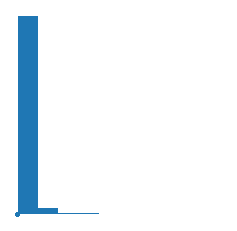

In [95]:
G=nx.from_pandas_edgelist(clg_msg_synth, 'Source', 'Target')
plt.figure(figsize=(4,4)) 
ax = plt.gca()
nx.draw(G,node_size=10, edge_size=.5)


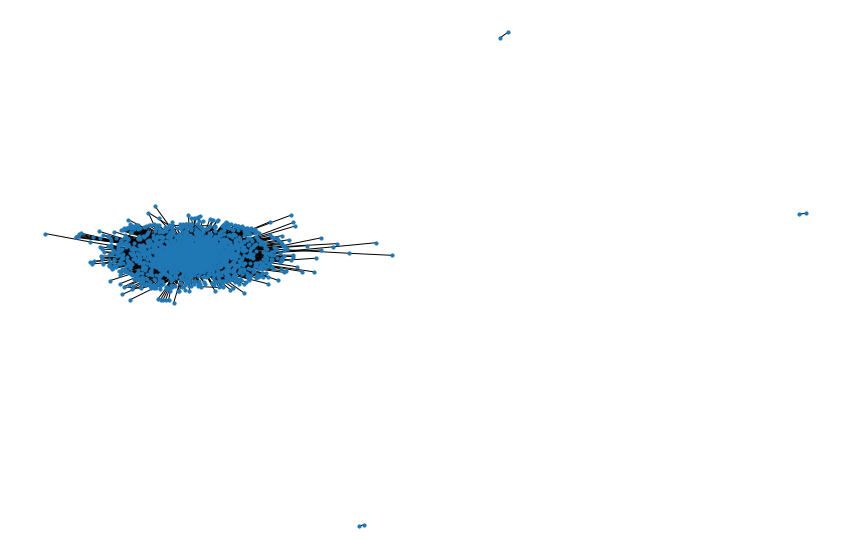

In [110]:
clg_msg_synth = pd.read_csv('./data/CollegeMsg/CollegeMsg-eType-T6-May11-0.3-Synth-s1',sep=' ',header=None)
clg_msg_synth.columns = ['Source','etype','Target','Time']
plt.figure(figsize=(15, 10)) 
ax = plt.gca()
nx.draw_spring(G,node_size=10, edge_size=.5)